# Experiment: Time constants

In [1]:
# imports
import numpy as np
import pandas as pd
import numpy.ma as ma
import importlib
import matplotlib
from astropy.stats import sigma_clipped_stats
from importlib import reload
import time
from astropy.io import fits

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#personal
from pipeline.est_pipeline import *
from pipeline.code.file_reader import *
from pipeline.code.corr_plots import *
from pipeline.code.cluster import *

import pipeline.code.Estimator as es
import pipeline.code.Estimator_R as er
#import pipeline.code.data_table as d_t
import pipeline.code.graph_code as gc

import pipeline.code.Correlator as Cor
from importlib import reload

## This project:
import t_const_code as tc

### All files

In [3]:
#Creating list of all corr files
dates = ['20180531', '20180601', '20181219', '20181221', '20181222', '20181223', '20210429', '20210430', '20210501', '20210502']
fts_f = []
count_lst = [0]

for d in dates:
    p = f'/home/emcewen/out/{d}/fits/'
    files = os.listdir(p)
    lgth_fits = [p + fn for fn in files if fnmatch.fnmatch(fn, '*tmax1000_tts.fits')]
    fts_f.extend(lgth_fits)
    count_lst.append(len(lgth_fits) + count_lst[-1])
    
fts_f.sort()

#### OR

In [26]:
# pulling from an updated csv
df_main = pd.read_csv("csv/main_paper_massdimm.csv")
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])

df_test = df_main[df_main['ttsub'] == True]
df_test = df_test[["dataname", 'DATETIME','MASS', 'DIMM', "ground_layer", "outfits"]].drop_duplicates(["dataname"])
df_test = df_test.sort_values('dataname').reset_index()
df_test.dropna()

In [37]:
# creating the input fits list
#fts_f = df_test["outfits"].tolist() # this doesn't work because the csv was created with the 200 length subtractions

# creating the count lst
df_dates = df_test["DATETIME"].map(lambda t: t.date()).unique()
count_arr = [df_test['DATETIME'].map(lambda t: t.date()).value_counts()[i] for i in df_dates]

count_lst = np.roll(np.cumsum(count_arr), 1)
count_lst[0] = 0

fts_f = []
# creating the first list
for dt in df_dates:
    d = dt.strftime('%Y%m%d')
    p = f'/home/emcewen/out/{d}/fits/'
    files = os.listdir(p)
    lgth_fits = [p + fn for fn in files if fnmatch.fnmatch(fn, '*tmax1000_tts.fits')]
    fts_f.extend(lgth_fits)

In [66]:
dates = [dt.strftime('%Y%m%d') for dt in df_dates]

In [55]:
df_test2 = pd.DataFrame()
df_test2["outfits"] = fts_f
df_test2["dataname"] = dataname_lst

In [60]:
# applying merge with more parameters
df_merge = df_test.merge(df_test2[['outfits', 'dataname']], on = 'dataname', how = 'left')

In [117]:
df_merge["DATETIME_tmp"] = df_merge['DATETIME'].dt.strftime('%Y%m%d')
df_merge[df_merge["DATETIME_tmp"] == dates[0]]

,index,dataname,DATETIME,MASS,DIMM,ground_layer,outfits_x,dataname_2,outfits_y,DATETIME_tmp
0,188,20180531_aocb0008o,2018-05-31 12:26:01,0.392237,0.533682,0.308640,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0008o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
1,24,20180531_aocb0014o,2018-05-31 12:45:31,0.603077,0.715584,0.310019,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0053o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
2,264,20180531_aocb0017o,2018-05-31 12:50:32,0.650034,0.750208,0.296197,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0061o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
3,160,20180531_aocb0019o,2018-05-31 12:53:17,0.650034,0.750208,0.296197,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0041o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
4,52,20180531_aocb0022o,2018-05-31 12:59:18,0.754123,0.763010,0.071507,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0057o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
5,80,20180531_aocb0026o,2018-05-31 13:05:22,0.798850,0.765544,NaN,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0077o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
6,272,20180531_aocb0029o,2018-05-31 13:10:17,0.714088,0.740929,0.136495,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0014o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
7,100,20180531_aocb0033o,2018-05-31 13:15:51,0.579515,0.648925,0.225558,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0017o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
8,88,20180531_aocb0037o,2018-05-31 13:21:38,0.506358,0.681591,0.387771,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0081o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531
9,208,20180531_aocb0041o,2018-05-31 13:27:29,0.558905,0.681176,0.317963,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531_aocb0019o,/home/emcewen/out/20180531/fits/20180531_aocb0...,20180531


In [105]:
df_merge[df_merge[]]["outfits_x"][0]

'/home/emcewen/out/20180531/fits/20180531_aocb0008o_tmax1000_tts.fits'

In [44]:
# recreating a df that looks like the above one

dataname_lst = [f[32:50] for f in fts_f]
dataname_lst

['20180531_aocb0008o',
 '20180531_aocb0053o',
 '20180531_aocb0061o',
 '20180531_aocb0041o',
 '20180531_aocb0057o',
 '20180531_aocb0077o',
 '20180531_aocb0014o',
 '20180531_aocb0017o',
 '20180531_aocb0081o',
 '20180531_aocb0019o',
 '20180531_aocb0065o',
 '20180531_aocb0082o',
 '20180531_aocb0022o',
 '20180531_aocb0026o',
 '20180531_aocb0069o',
 '20180531_aocb0085o',
 '20180531_aocb0029o',
 '20180531_aocb0033o',
 '20180531_aocb0073o',
 '20180531_aocb0037o',
 '20180531_aocb0089o',
 '20180531_aocb0045o',
 '20180531_aocb0049o',
 '20180531_aocb0092o',
 '20180531_aocb0093o',
 '20180601_aocb0066o',
 '20180601_aocb0001o',
 '20180601_aocb0036o',
 '20180601_aocb0044o',
 '20180601_aocb0018o',
 '20180601_aocb0046o',
 '20180601_aocb0020o',
 '20180601_aocb0004o',
 '20180601_aocb0060o',
 '20180601_aocb0076o',
 '20180601_aocb0084o',
 '20180601_aocb0006o',
 '20180601_aocb0022o',
 '20180601_aocb0048o',
 '20180601_aocb0024o',
 '20180601_aocb0008o',
 '20180601_aocb0062o',
 '20180601_aocb0078o',
 '20180601_

In [97]:
fts_f

['/home/emcewen/out/20180531/fits/20180531_aocb0008o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0053o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0061o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0041o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0057o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0077o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0014o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0017o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0081o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0019o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0065o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0082o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0022o_tmax1000_tts.fits',
 '/home/emcewen/out/20180531/fits/20180531_aocb0026

# All Decays, per night

This is to get an idea of what one WFS is doing, per night. Creating a colorscale by time will help us see if the decay changes throughout the night

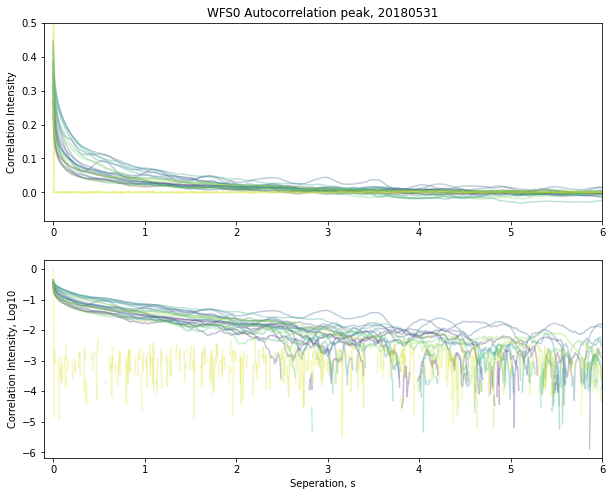

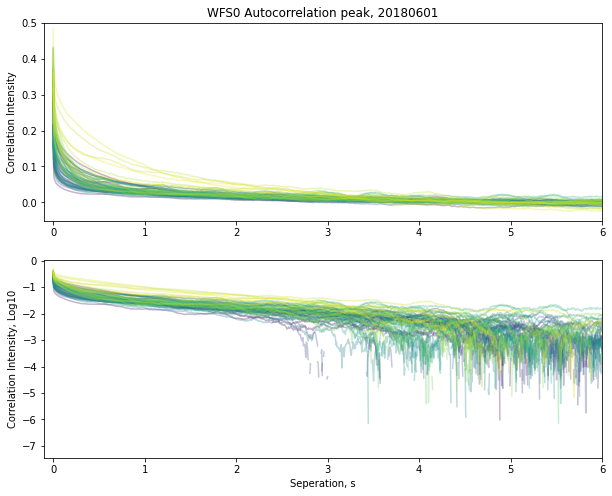

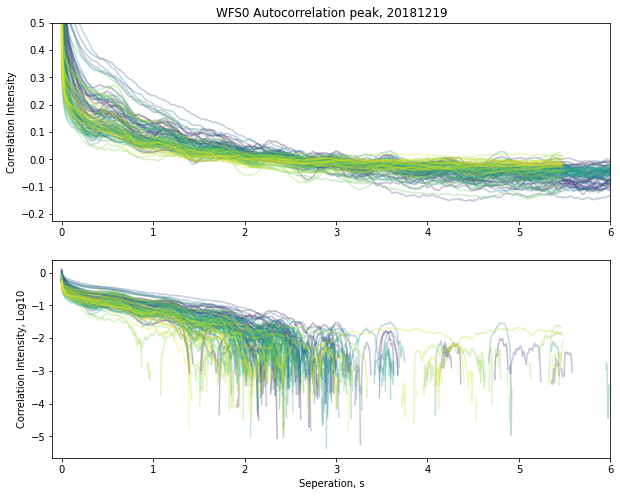

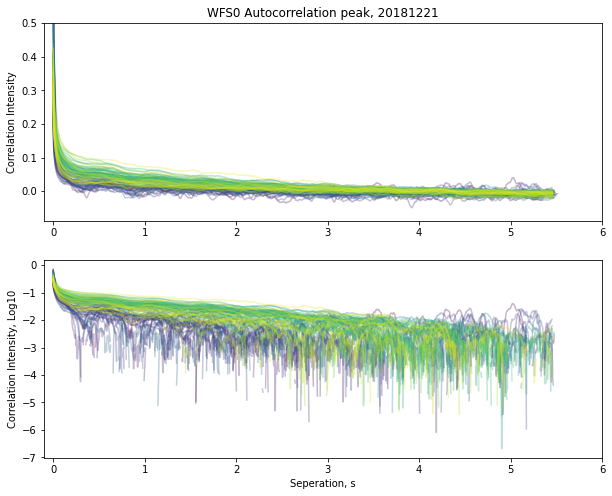

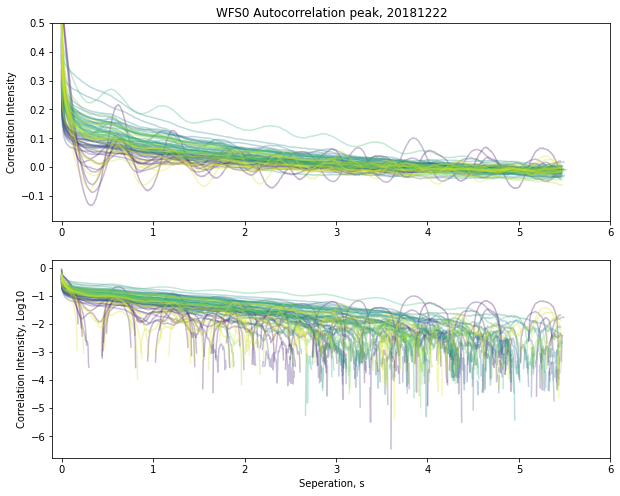

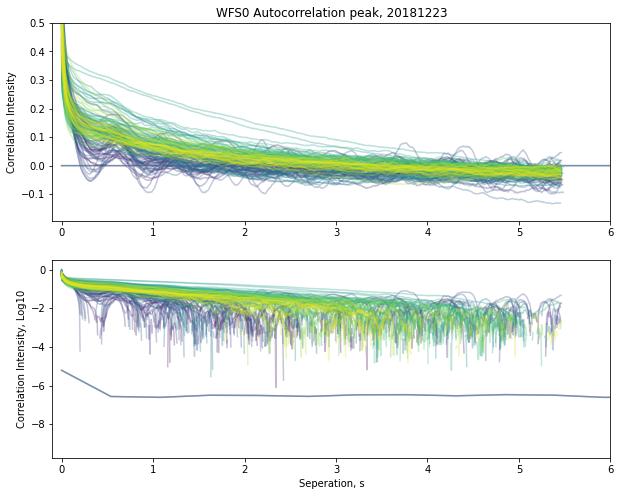

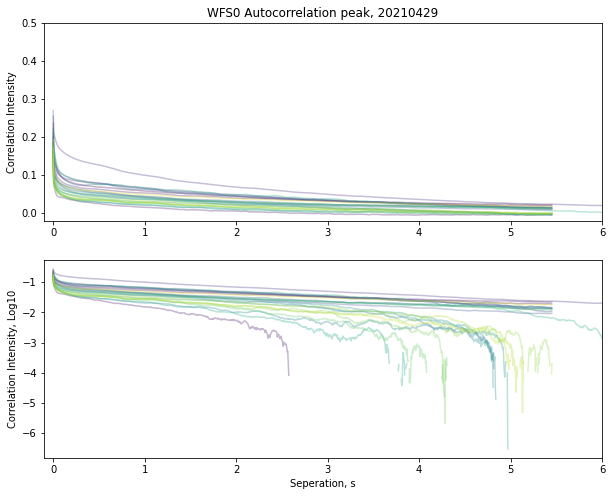

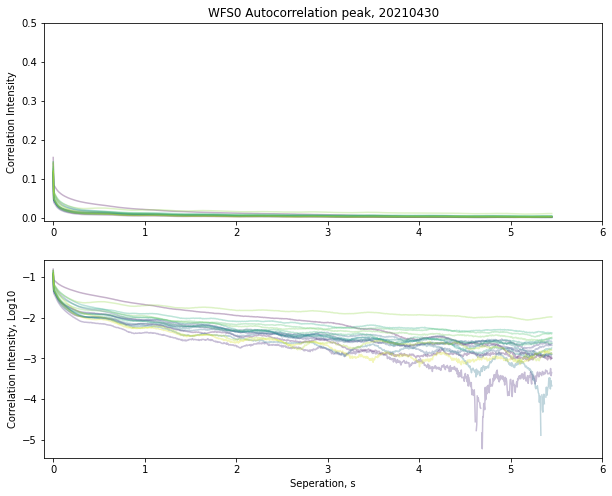

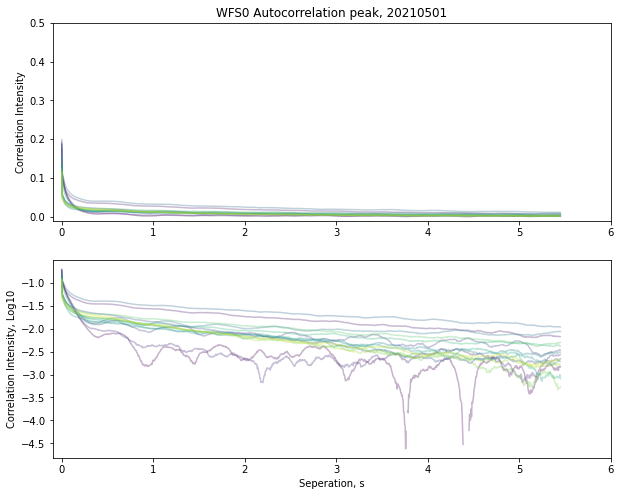

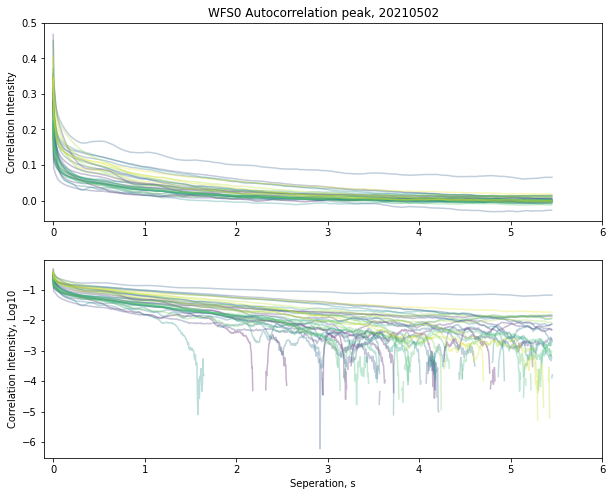

In [137]:
# for each date, plot
cmap = matplotlib.cm.get_cmap('viridis')

for d in dates:
    fig, ax =  plt.subplots(2,1,figsize=(10,8))
    ax[0].set_ylabel('Correlation Intensity')
    ax[1].set_ylabel('Correlation Intensity, Log10')
    ax[1].set_xlabel('Seperation, s')
    ax[0].set_title(f'WFS0 Autocorrelation peak, {d}')
    
    # fiding files for this date:
    files_tmp = df_merge[df_merge["DATETIME_tmp"] == d]["outfits_x"]
    f_list = files_tmp.shape[0]
    
    # for each file, pull one wfs, plot on 
    for c, f in enumerate(files_tmp):
        pull_data = Cor.Correlator("", "", "", f_file = f)
        avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
        center_peak_0 = avg_acor[0, :, 7, 7] # takes just WFS 0 peak
        t_coords = np.arange(center_peak_0.shape[0]) # this is the time in frames
        t_coords = t_coords / pull_data.hz_pull()
        
        ax[0].plot(t_coords, center_peak_0, c=cmap(c/f_list), alpha=0.3)
        ax[1].plot(t_coords, np.log10(center_peak_0), c=cmap(c/f_list), alpha=0.3)
    ax[0].set_ylim(top=0.5)
    ax[0].set_xlim(left=-0.1, right=6)
    ax[1].set_xlim(left=-0.1, right=6)
    plt.show()

# Fitting to decay of corr map center peak

In [7]:
# all functions move to t_const functions
reload(tc)
reload(Cor)

<module 'pipeline.code.Correlator' from '/home/emcewen/code_dev/pipeline/code/Correlator.py'>

## Test: Decay plotting functions

In [3]:
p_file = "/home/emcewen/out/20210830/fits/20210830_aocb0075o_tmax1000_tts.fits"
p_file = "/home/emcewen/out/20210828/plots/ccor_all_gif/20210828_aocb0044tt_c_tts_ccor_all_0.gif"
#pull_data = Cor.Correlator("", "", "", f_file = p_file)

In [4]:
tc.decay_plot(p_file, 700, c_min = 50, c_max = 500)

OSError: Empty or corrupt FITS file

## Late time fit

In [ ]:
# 

### Late Time Fit: WFS avg, all nights

In [40]:
## The initial way of saving parameters, 
# BAD simplifies things, should save less processed

reload(tc)
a_lst = []
b_lst = []
#lengths = [200, 300, 400, 500]
ln = 300

# Calculating fit parameters for all files, average per aocb
for file in fts_f:
    try:
        a, b = tc.decay_fn_var(file, 600, c_min = 50, c_max = ln)
        a_lst.append(a)
        b_lst.append(b)
    except:
        print('error with file: ', file)
        a_lst.append(0) # files with errors sent to 0
        b_lst.append(0) # files with errors sent to 0

error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0091o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0092o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0093o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0094o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0095o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0096o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0097o_tmax1000_tts.fits


In [144]:
# Trying to save parameters,
# try 2
reload(tc)
f1_lst = []

ln = 300

# Calculating fit parameters for all files, average per aocb
for file in fts_f:
    try:
        center_avg, t, f1 = tc.decay_fn_2(file, 600, c_min = 50, c_max = ln)
        f1_lst.append(f1[:2])
    except:
        print('error with file: ', file)
        f1_lst.append(np.zeros(2)) # files with errors sent to 0


error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0091o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0092o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0093o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0094o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0095o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0096o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0097o_tmax1000_tts.fits


In [154]:
f1_lst = np.array(f1_lst)

In [ ]:
## IF USING DATAFRAME:
# add the fits to the dataframe to save
f[32:50]

# TODO: forgot what I was doing here

In [86]:
# Plotting fits to MASS DIMM

mass = np.array([df_test[df_test["dataname"] == f[32:50]]["ground_layer"].tolist() for f in fts_f]).flatten()

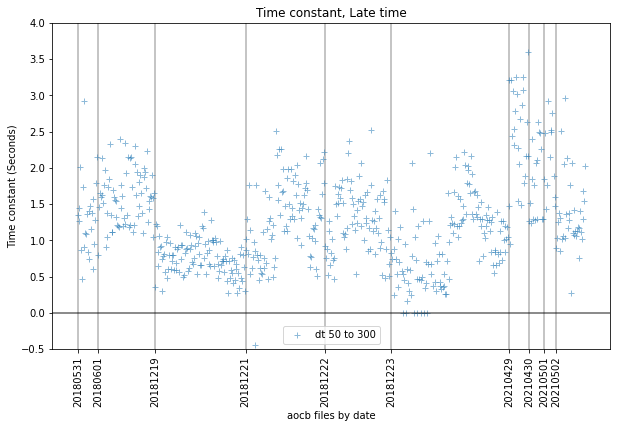

In [67]:
# plotting all time coefficients, one length 
plt.figure(figsize=(10,6))
color_list = ["r", "b", "cyan"]
plt.title("Time constant, Late time")

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)
    
plt.plot(a_lst, '+', alpha = 0.5, label = f"dt 50 to {ln}")

plt.axhline(0, c="black", alpha = 0.6)
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Time constant (Seconds)')
plt.xlabel('aocb files by date')
plt.legend()
plt.ylim(-0.5, 4)
plt.show()

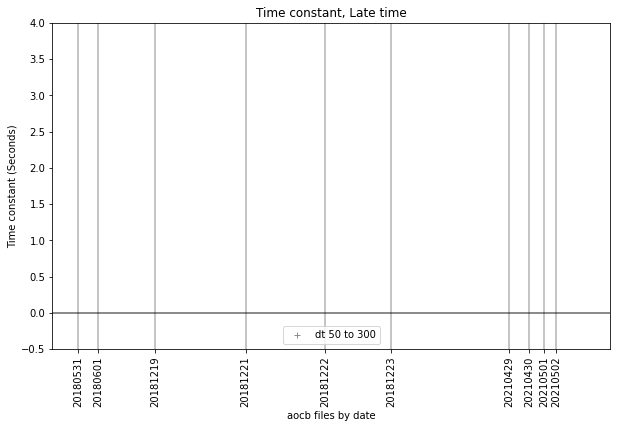

In [160]:
# plotting all time coefficients, one length 
plt.figure(figsize=(10,6))
color_list = ["r", "b", "cyan"]
plt.title("Time constant, Late time")

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)
    
plt.plot(np.exp(f1_lst[:,1]), 'r+', alpha = 0.5, label = f"dt 50 to {ln}")
#plt.plot(1/f1_lst[:,0], 'b+', alpha = 0.5, label = f"dt 50 to {ln}")

plt.axhline(0, c="black", alpha = 0.6)
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Time constant (Seconds)')
plt.xlabel('aocb files by date')
plt.legend()
plt.ylim(-0.5, 4)
plt.show()

(0.0, 4.0)

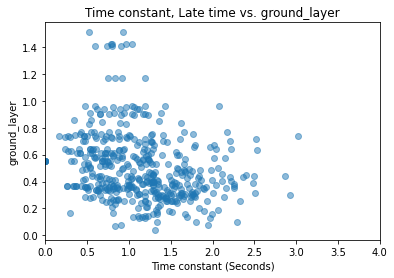

In [94]:
plt.title("Time constant, Late time vs. ground_layer")
plt.ylabel('ground_layer')
plt.xlabel('Time constant (Seconds)')
plt.plot(a_lst, mass, "o", alpha = 0.5)
plt.xlim(0, 4)

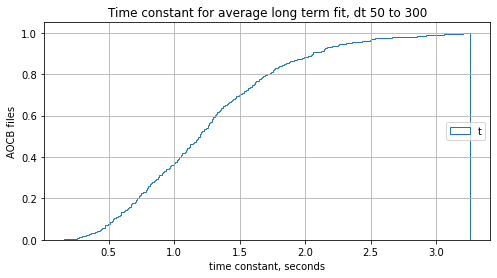

In [93]:
## Cumulative Histogram normalized

mu = 200
sigma = 25
n_bins = 300
x = np.sort(a_lst)[10:-10] 

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='t')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
plt.title(f"Time constant for average long term fit, dt 50 to {ln}")
plt.ylabel("AOCB files")
plt.xlabel("time constant, seconds")

plt.show()

In [161]:
cnt_lst_all = count_lst.copy()

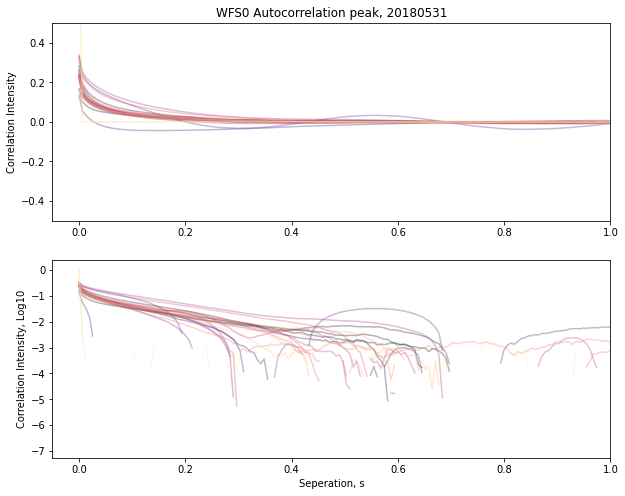

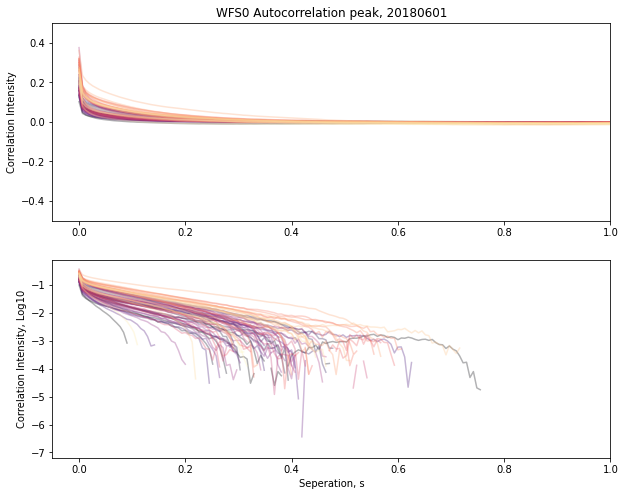

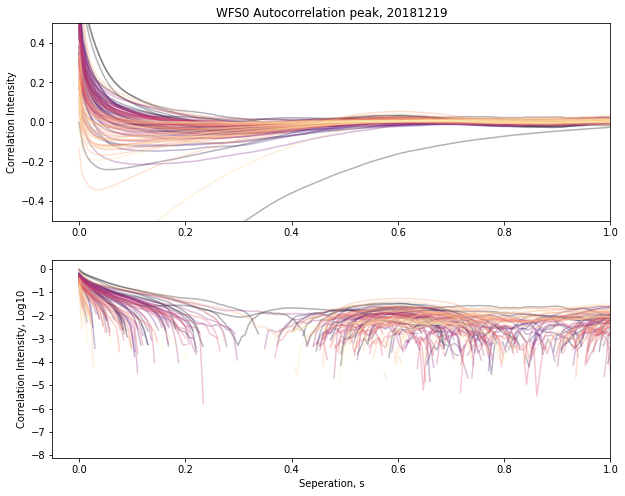

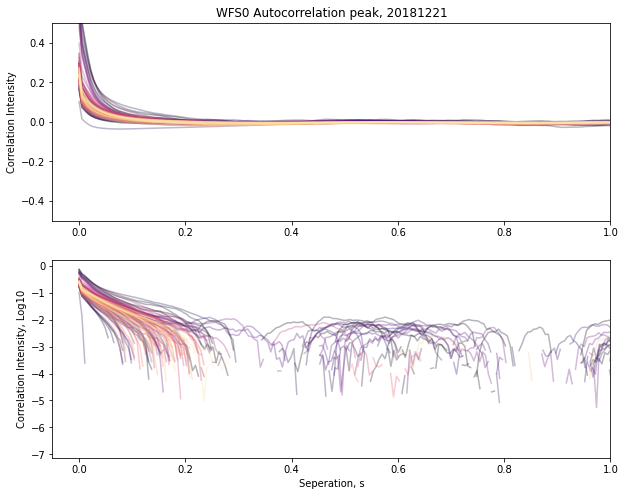

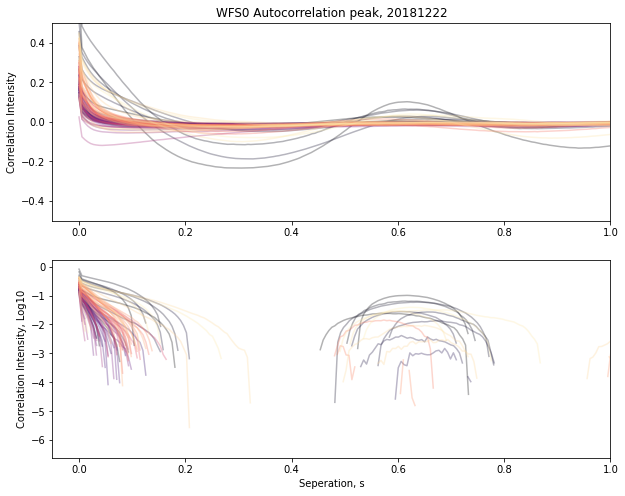

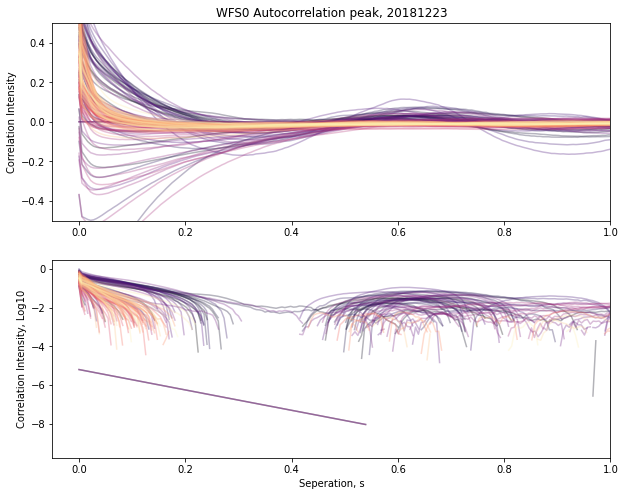

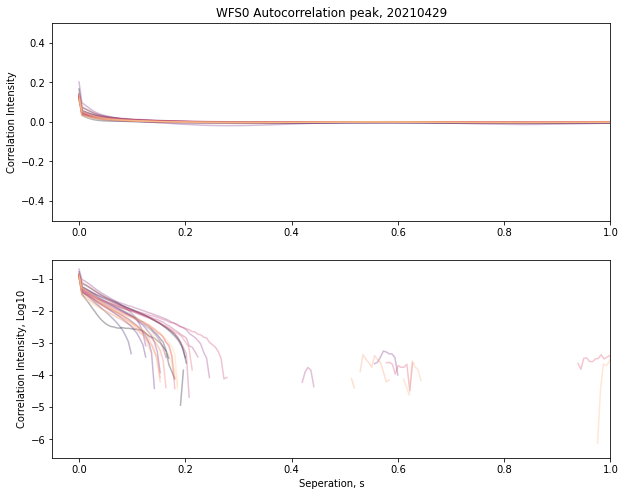

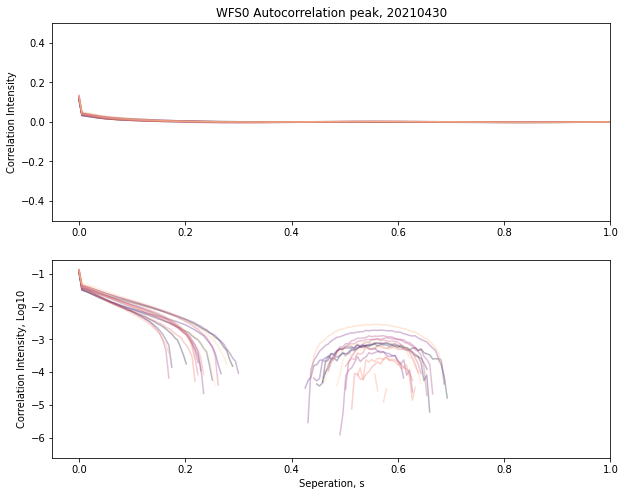

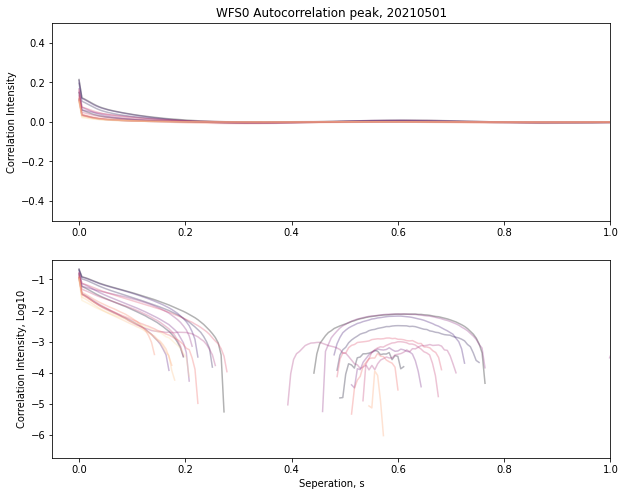

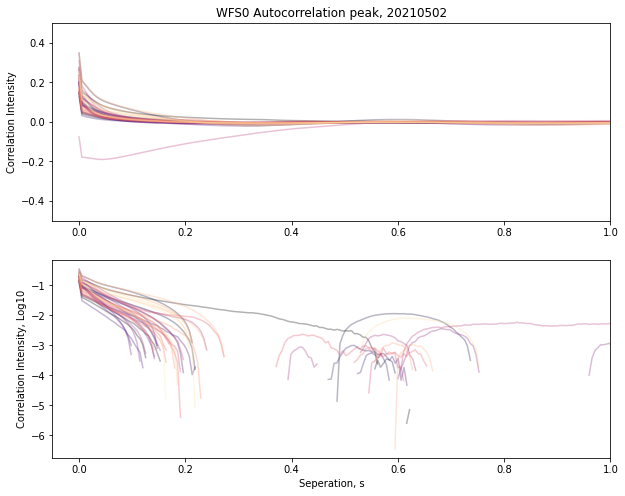

In [166]:
# for each date, plot SUBTRACTED FITS
cmap = matplotlib.cm.get_cmap('magma')

# We're recalculating the fits bc I save them badly
tmax_p = 600 
c_min = 50
c_max = 300

cnt_lst_all = count_lst.copy()
cnt_lst_all = np.append(cnt_lst_all,[len(fts_f)])

# Dates, counts
for c, d in enumerate(dates):
    fig, ax =  plt.subplots(2,1,figsize=(10,8))
    ax[0].set_ylabel('Correlation Intensity')
    ax[1].set_ylabel('Correlation Intensity, Log10')
    ax[1].set_xlabel('Seperation, s')
    ax[0].set_title(f'WFS0 Autocorrelation peak, {d}')
    
    # fiding files for this date:
    files_tmp = df_merge[df_merge["DATETIME_tmp"] == d]["outfits_x"]
    f_list = files_tmp.shape[0]
    
    # indexing into lists based on counts per dates
    c1, c2 = cnt_lst_all[c], cnt_lst_all[c+1]
    
    # for each file, pull one wfs, plot on 
    for e, f in enumerate(fts_f[c1:c2]):
        pull_data = Cor.Correlator("", "", "", f_file = f)
        avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
        center_peak_avg = np.average(avg_acor[:3, :, 7, 7], axis = 0) # takes average
        
        # X coordinates
        t = np.arange(center_peak_avg.shape[0]) # this is the time in frames
        t_coords = t / pull_data.hz_pull() # this is the time in seconds
        
        # what are our fits?
        f1 = f1_lst[c1 + e]
        
        # Apply fit info
        log_fit = f1[0] * t + f1[1]
        center_peak_sub_avg = center_peak_avg[t] - np.exp(log_fit)
        
        
        ax[0].plot(t_coords, center_peak_sub_avg, c=cmap(e/f_list), alpha=0.3)
        ax[1].plot(t_coords, np.log10(center_peak_sub_avg), c=cmap(e/f_list), alpha=0.3)
    ax[0].set_ylim(top=0.5, bottom = -0.5)
    ax[0].set_xlim(left=-0.05, right=1)
    ax[1].set_xlim(left=-0.05, right=1)
    plt.show()

### Late Time Fit: WFS avg, all nights, multiple lengths

In [4]:
reload(tc)
a_lst = []
lengths = [200, 300, 400, 500]
# Calculating fit parameters for all files, average per aocb
for ln in lengths:
    a_lst_tmp = []
    for file in fts_f:
        try:
            a, b = tc.decay_fn_var(file, 600, c_min = 50, c_max = ln)
            a_lst_tmp.append(a)
        except:
            print('error with file: ', file)
            a_lst_tmp.append(0) # files with errors sent to 0
    a_lst.append(a_lst_tmp)

error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0091o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0092o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0093o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0094o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0095o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0096o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0097o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0091o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0092o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0093o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20181223/fits/20181223_aocb0094o_tmax1000_tts.fits
error with file:  /home/emcewen/out/2018122

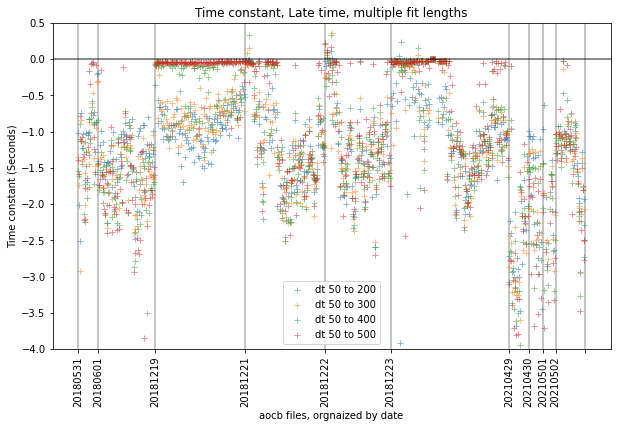

In [22]:
# plotting all time coefficients 

color_list = ["r", "b", "cyan"]

plt.figure(figsize=(10,6))

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)
    
lengths = [200, 300, 400, 500]
for i, ln in enumerate(lengths):
    plt.plot(a_lst[i], '+', alpha = 0.5, label = f"dt 50 to {ln}")

plt.axhline(0, c="black", alpha = 0.6)
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Time constant (Seconds)')
plt.xlabel('aocb files, orgnaized by date')
plt.title("Time constant, Late time, multiple fit lengths")
plt.legend()
plt.ylim(-4, 0.5)
plt.show()

### Fitting time constants, WFS avg, nightly averages

In [20]:
## Per night, mean and standard deviation
avg_a = [[],[],[],[],[]]
std_a = [[],[],[],[],[]]

for i in range(len(count_lst) - 1):
    x = count_lst[i]
    y = count_lst[i+1]
    
    for i, ln in enumerate(lengths):
        avg_a[i].append(np.average(a_lst[i][x:y]))
        std_a[i].append(np.std(a_lst[i][x:y]))
    

NameError: name 'a_lst' is not defined

In [15]:
# plotting
lengths = ["200", "300", "400", "500"]
colors = ["ob", "og", "or", "oc"]

plt.figure(figsize=(10,6))

for i, ln in enumerate(lengths):
    avg_tmp = avg_a[i]
    std_tmp = std_a[i]
    x = np.arange(len(avg_tmp)) + i /10
    
    plt.errorbar(x, avg_tmp, yerr = std_tmp, fmt = colors[i], barsabove=True, label = ln, alpha = 0.6)
    plt.xticks(np.arange(len(avg_tmp)), dates, rotation ='vertical') 
plt.title("Time constant, Late time, nightly averages")
plt.legend()
plt.ylim(-4, 1)
plt.show()

NameError: name 'avg_a' is not defined

<Figure size 720x432 with 0 Axes>

## Late time fit: per WFS

In [ ]:
reload(tc)
# Finding fits per WFS
a_lst_wfs = []

# Calculating fit parameters for all files, average per aocb
for file in fts_f:
    a_lst_tmp = []
    for wfs in range(3):
        try:
            a, _ = tc.decay_fn_wfs_var(file, 400, wfs=wfs, c_min = 50, c_max = 300)
            a_lst_tmp.append(a)
        except:
            print('error with file: ', file)
            a_lst_tmp.append(0) # files with errors sent to 0
    a_lst_wfs.append(a_lst_tmp)

error with file:  /home/emcewen/out/20180531/fits/20180531_aocb0092o_tmax1000_tts.fits
error with file:  /home/emcewen/out/20180601/fits/20180601_aocb0050o_tmax1000_tts.fits


In [ ]:
# plotting all time coefficients 

color_list = ["r", "b", "cyan"]
plt.figure(figsize=(10,6))

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)
    
for wfs in range(3):
    plt.plot(a_lst_wfs[wfs], '+', alpha = 0.5, label = f"WFS {wfs}")

plt.axhline(0, c="black", alpha = 0.6)
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Time constant (Seconds)')
plt.xlabel('aocb files, orgnaized by date')
plt.title("Time constant, Late time, by wfs")
plt.legend()
#plt.ylim(-4, 0.5)
plt.show()

## Test: Fitting decay Function 

## 2000 tmax Peak Decay:

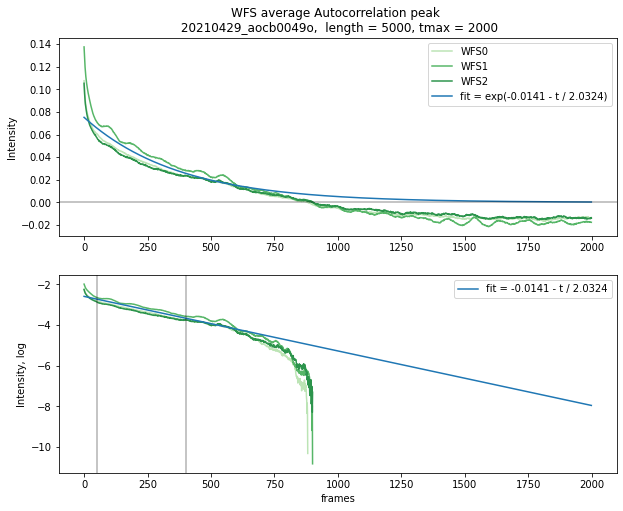

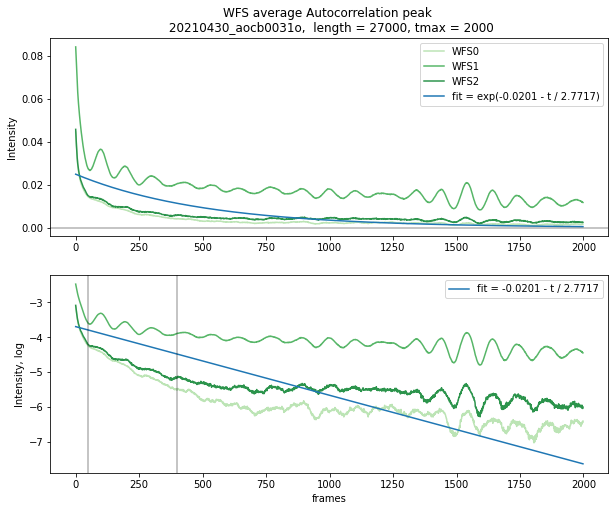

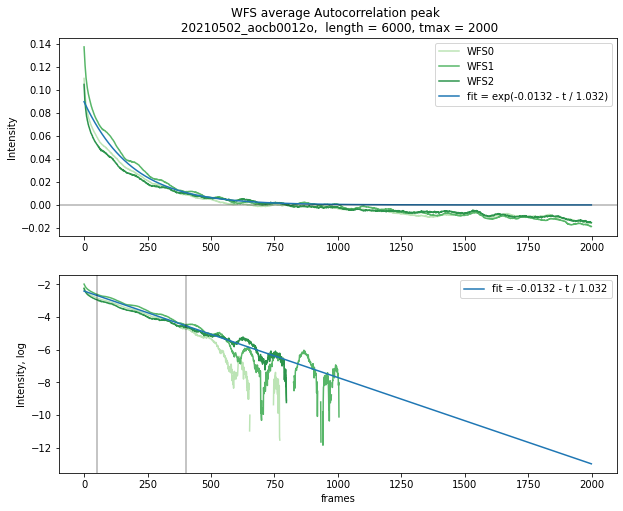

In [224]:
dates = ['20210429', '20210430', '20210502' ]
aocbs = ['aocb0049o','aocb0031o','aocb0012o']

for ex, i in enumerate(dates):
        tc.decay_plot(f"/home/emcewen/test_lengths/fits/{i}_{aocbs[ex]}_tmax2000_stt.fits", 1999, c_min = 50, c_max = 400)

### Example Fits: early and late decays

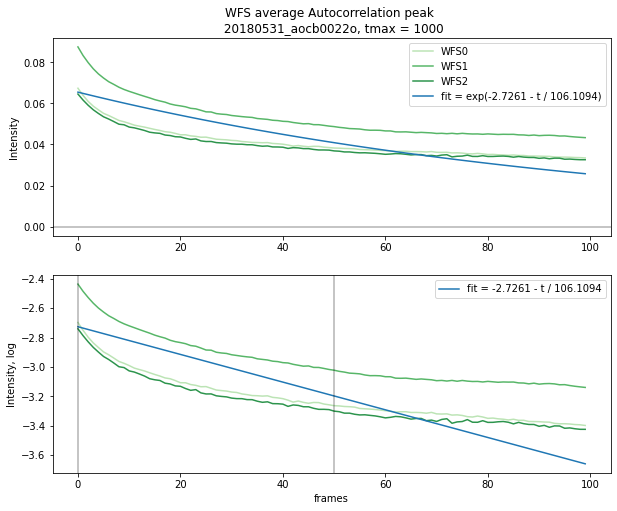

In [77]:
p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"

tmax_p = 100
decay_plot(p_file, tmax_p, c_min = 0, c_max = 50)

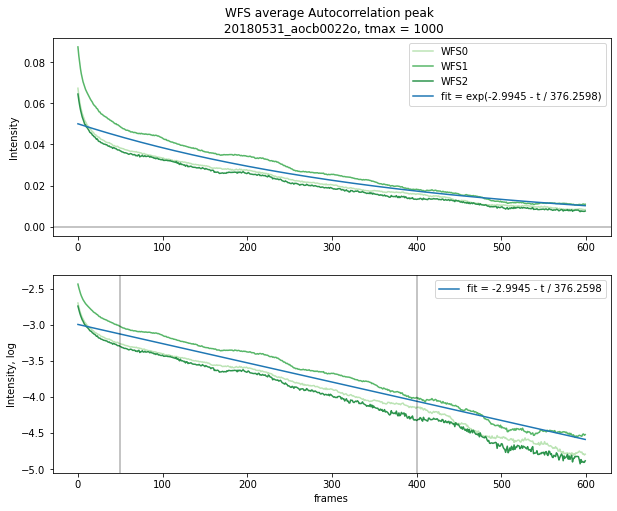

In [156]:
#p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"

tmax_p = 600
decay_plot(p_file, tmax_p, c_min = 50, c_max = 400)

## Testing: New decay function, new exponential decay function

[0.02945466 0.06606966 0.04357628]
[[ 1.52571435e-07  9.72743905e-08 -3.25804713e-08]
 [ 9.72743905e-08  6.69627141e-06  7.44282808e-07]
 [-3.25804713e-08  7.44282808e-07  1.04529700e-07]]


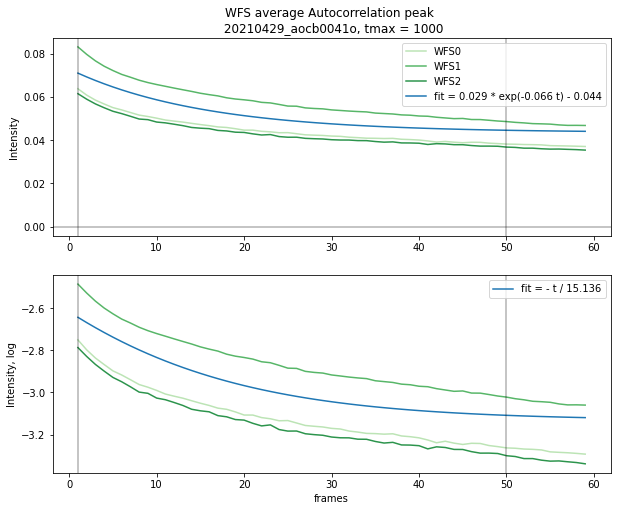

In [167]:
#p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"
p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"

tmax_p = 60
decay_exp_plot(p_file, tmax_p, c_min = 1, c_max = 50)

[-9.91957520e+01 -7.95441323e-07  9.92416970e+01]
[[-1.83800417e+07  1.47370599e-01  1.83800418e+07]
 [ 1.47370599e-01 -1.18161278e-09 -1.47370600e-01]
 [ 1.83800418e+07 -1.47370600e-01 -1.83800418e+07]]


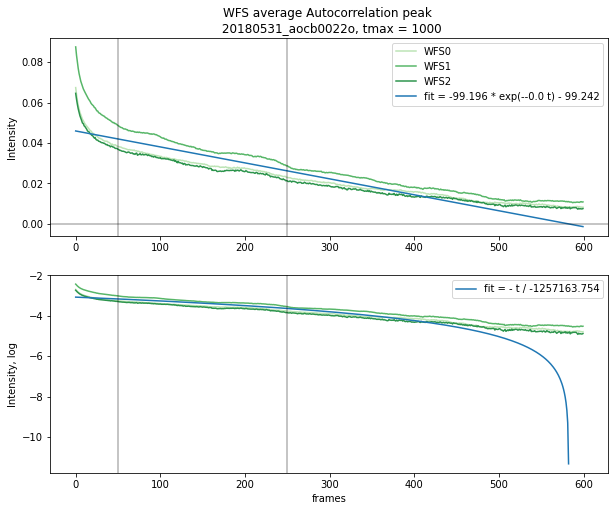

In [147]:
p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"

tmax_p = 600
decay_exp_plot(p_file, tmax_p, c_min = 50, c_max = 50)

## Fitting to Dome, subtracting for WFS 

In [47]:
## EXAMPLE: Subtraction of Dome fit
# for each file, find the dome fitting and subtract it 
tmax_p = 250
c_min = 50
c_max = 200
#p_file = "/home/emcewen/out/20210429/fits/20210429_aocb0041o_tmax1000_tts.fits"
p_file = "/home/emcewen/out/20180531/fits/20180531_aocb0022o_tmax1000_tts.fits"

pull_data = Cor.Correlator("", "", "", f_file = p_file)
center_avg, t, f1 = tc.decay_fn(p_file, tmax_p, c_min, c_max)
center_peak_avg = tc.center_peak_pull(p_file)
dt = np.arange(tmax_p) #integers

# Log fit
log_fit = tc.Linear_est(t, f1[0], f1[1])
center_peak_sub = center_peak_avg[:, dt] - np.exp(log_fit)
center_peak_sub_avg = center_avg[dt] - np.exp(log_fit)

# rounded fit variables
a = np.around(1/f1[0] / pull_data.hz_pull(), 4) 
b = np.around(f1[1] / pull_data.hz_pull(), 4)

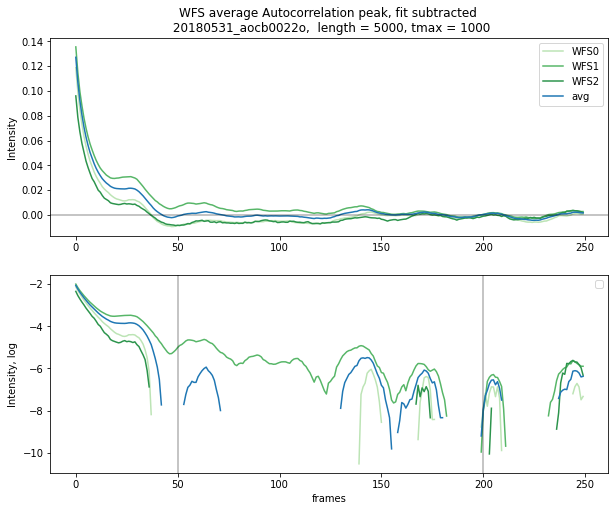

In [49]:
## Ploting a dome subtracted fit 
## Center Peak Plots
fig, ax =  plt.subplots(2,1,figsize=(10,8))
g_cmap = cm.get_cmap('Greens', 8)
for i in range(3): 
    c_float = (i+2)/6
    ax[0].plot(t, center_peak_sub[i], label = "WFS" + str(i), color = g_cmap(c_float))
    ax[1].plot(t, np.log(center_peak_sub[i]),  color = g_cmap(c_float))
    
ax[0].plot(center_peak_sub_avg, label = "avg")
ax[1].plot(np.log(center_peak_sub_avg))
#ax[1].plot(t, log_fit, label = f"fit = {b} - t / {-a}")
#ax[0].plot(t, np.exp(log_fit), label = f"fit = exp({b} - t / {-a})")

ax[0].axhline(0, color="black", alpha=0.3)
ax[1].axvline(c_min, color="black", alpha=0.3)
ax[1].axvline(c_max, color="black", alpha=0.3)

ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('Intensity')
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('Intensity, log')
ax[1].set_xlabel('frames')

ax[0].set_title(f'WFS average Autocorrelation peak, fit subtracted \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
#fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
#plt.savefig(fname, dpi=300)
plt.show()

In [45]:
# try fitting to t^3/5
def Tau(x, t, b):
    return b*np.exp(-((x/t)**(3/5)))

def Tau_Fit(x, y):
    # returns [slope, intercept]
    # the optimized curve returns the optimized abc values for Gaussian
    # [height, position of peak center (mean), standard deviation]
    #popt, pcov = opt.curve_fit(Tau, x, y)
    return opt.curve_fit(Tau, x, y)

In [48]:
p_file = "/home/emcewen/out/20180531/fits/20180531_aocb0022o_tmax1000_tts.fits"
## EXAMPLE: Subtraction of Dome fit
# for each file, find the dome fitting and subtract it 
import scipy.optimize as opt
t_min = 5
t_max = 50
tmax_p = 100

pull_data = Cor.Correlator("", "", "", f_file = p_file)
t = np.arange(tmax_p)

# Tau fit
x = t[t_min:t_max]
y = center_peak_sub_avg[t_min:t_max]
f1, f2 = Tau_Fit(x, y)
yp = Tau(t, f1[0], f1[1])

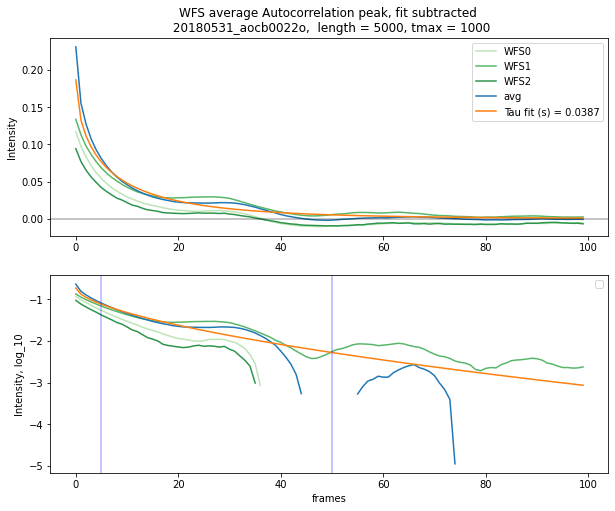

In [53]:
## Plotting above
## Center Peak Plots
fig, ax =  plt.subplots(2,1,figsize=(10,8))
g_cmap = cm.get_cmap('Greens', 8)
for i in range(3): 
    c_float = (i+2)/6
    ax[0].plot(t, center_peak_sub[i][t], label = "WFS" + str(i), color = g_cmap(c_float))
    ax[1].plot(t, np.log10(center_peak_sub[i][t]),  color = g_cmap(c_float))
    
# plotting average
ax[0].plot(center_peak_sub_avg[t], label = "avg")
ax[1].plot(np.log10(center_peak_sub_avg[t]))

# plotting Fit
ax[0].plot(t, yp, label = f"Tau fit (s) = {np.around(f1[0]/ pull_data.hz_pull(),4)}")
ax[1].plot(t, np.log10(yp))
#ax[1].plot(t, log_fit, label = f"fit = {b} - t / {-a}")
#ax[0].plot(t, np.exp(log_fit), label = f"fit = exp({b} - t / {-a})")

ax[0].axhline(0, color="black", alpha=0.3)
ax[1].axvline(t_min, color="blue", alpha=0.3)
ax[1].axvline(t_max, color="blue", alpha=0.3)

ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('Intensity')
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('Intensity, log_10')
ax[1].set_xlabel('frames')

ax[0].set_title(f'WFS average Autocorrelation peak, fit subtracted \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
#fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
#plt.savefig(fname, dpi=300)
plt.show()

In [50]:
## EXAMPLE: Subtraction of Dome fit
# for each file, find the dome fitting and subtract it 
import scipy.optimize as opt
t_min = 5
t_max = 50
tmax_p = 100

pull_data = Cor.Correlator("", "", "", f_file = p_file)
t = np.arange(tmax_p)

# Tau fit
x = t[t_min:t_max]
y = center_peak_sub_avg[t_min:t_max]
f1, f2 = Tau_Fit(x, y)
yp = Tau(t, f1[0], f1[1])

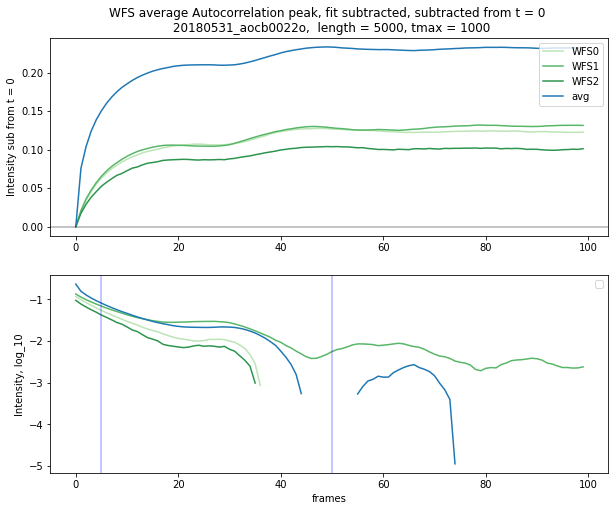

In [57]:
## Plotting above
## Center Peak Plots
fig, ax =  plt.subplots(2,1,figsize=(10,8))
g_cmap = cm.get_cmap('Greens', 8)
for i in range(3): 
    c_float = (i+2)/6
    ax[0].plot(t, center_peak_sub[i][0] - center_peak_sub[i][t], label = "WFS" + str(i), color = g_cmap(c_float))
    ax[1].plot(t, np.log10(center_peak_sub[i][t]),  color = g_cmap(c_float))
    
# plotting average
ax[0].plot(center_peak_sub_avg[0] - center_peak_sub_avg[t], label = "avg")
ax[1].plot(np.log10(center_peak_sub_avg[t]))

# plotting Fit
#ax[0].plot(t, yp, label = f"Tau fit (s) = {np.around(f1[0]/ pull_data.hz_pull(),4)}")
#ax[1].plot(t, np.log10(yp))
#ax[1].plot(t, log_fit, label = f"fit = {b} - t / {-a}")
#ax[0].plot(t, np.exp(log_fit), label = f"fit = exp({b} - t / {-a})")

ax[0].axhline(0, color="black", alpha=0.3)
ax[1].axvline(t_min, color="blue", alpha=0.3)
ax[1].axvline(t_max, color="blue", alpha=0.3)

ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('Intensity sub from t = 0')
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('Intensity, log_10')
ax[1].set_xlabel('frames')

ax[0].set_title(f'WFS average Autocorrelation peak, fit subtracted, subtracted from t = 0 \n {pull_data.name},  length = {pull_data.x_slopes.shape[1]}, tmax = {pull_data.tmax}')
#fname = p_file.replace("fits/", "decay/").replace(".fits", ".png")
#plt.savefig(fname, dpi=300)
plt.show()

## Short term Fits: all nights

In [58]:
p_file = "/home/emcewen/out/20180531/fits/20180531_aocb0022o_tmax1000_tts.fits"
## EXAMPLE: Subtraction of Dome fit
# for each file, find the dome fitting and subtract it 
import scipy.optimize as opt
t_min = 5
t_max = 50
tmax_p = 100

pull_data = Cor.Correlator("", "", "", f_file = p_file)
t = np.arange(tmax_p)


center_avg, t, f1 = tc.decay_fn(p_file, tmax_p, c_min, c_max)
center_peak_avg = tc.center_peak_pull(p_file)
dt = np.arange(tmax_p) #integers

# Log fit
log_fit = tc.Linear_est(t, f1[0], f1[1])
center_peak_sub = center_peak_avg[:, dt] - np.exp(log_fit)
center_peak_sub_avg = center_avg[dt] - np.exp(log_fit)

# Tau fit
x = t[t_min:t_max]
y = center_peak_sub_avg[t_min:t_max]
f1, f2 = Tau_Fit(x, y)
yp = Tau(t, f1[0], f1[1])

############

reload(tc)
a_lst = []
#lengths = [200, 300, 400, 500]
ln = 300

t_min = 5
t_max = 50

# Calculating fit parameters for all files, average per aocb
for file in fts_f:
    try:
        # fitting the dome
        center_avg, t, f1 = tc.decay_fn(p_file, tmax_p, c_min=c_min, c_max=c_max)
        center_peak_avg = tc.center_peak_pull(p_file)
        dt = np.arange(tmax_p) #integers
        log_fit = tc.Linear_est(t, f1[0], f1[1])
        
        #subtracting the dome fit
        center_peak_sub = center_peak_avg[:, dt] - np.exp(log_fit)
        
        # Tau fit
        x = t[t_min:t_max]
        y = center_peak_sub_avg[t_min:t_max]
        f1, f2 = Tau_Fit(x, y)
        
        a, b = tc.decay_fn_var(file, 600, c_min = 50, c_max = ln)
        a_lst.append(f1)
    except:
        print('error with file: ', file)
        a_lst.append(0) # files with errors sent to 0


# Noise Fitting: dt=0 actual vs linear fit difference

## t = 0 for all files:

In [9]:
# Running WFS diff for all used files
t0_lst = []
# collecting noise values:
for file in fts_f:
    try:
        pull_data = Cor.Correlator("", "", "", f_file = file)
        avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
        center_peak_avg_0 = avg_acor[:3, 0, 7, 7]
        t0_lst.append(center_peak_avg_0)
    except:
        print('error with file: ', file)
t0_lst_T = np.array(t0_lst).T
file_range = np.arange(t0_lst_T.shape[1])

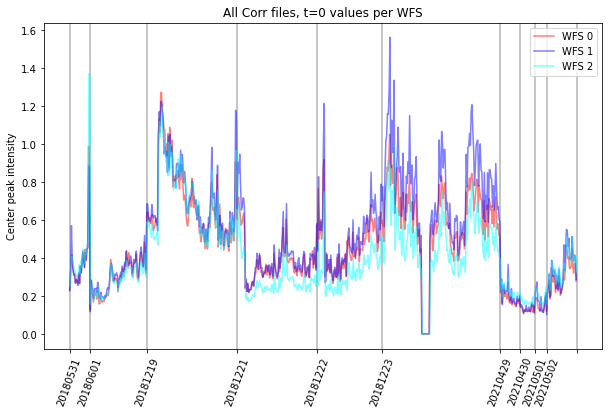

In [20]:
## plotting all files t=0 for all wfs
plt.figure(figsize=(10,6))
color_list = ["r", "b", "cyan"]

# adding lines to make each date visible
for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)

#Want to take the t=0 for each file, offsetting them a bit so that we can see different wfs
for wfs in range(3):
    c_float = (wfs+2)/6
    plt.plot(file_range + 0.3*wfs, t0_lst_T[wfs], alpha = 0.5, label = f"WFS {wfs}",  color=color_list[wfs])

plt.xticks(count_lst, dates, rotation = 70) 
plt.ylabel("Center peak intensity")
plt.title("All Corr files, t=0 values per WFS")
plt.legend(loc = 'upper right')
plt.show()

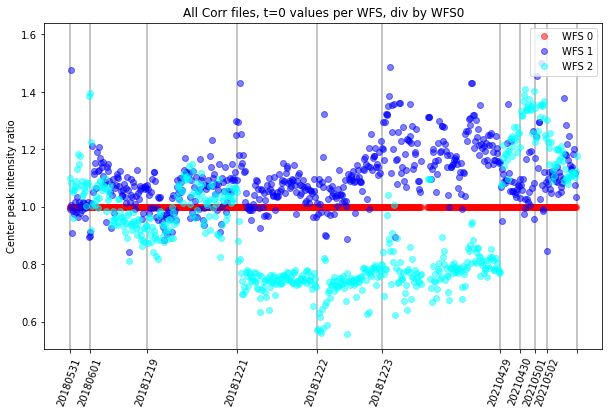

In [25]:
## Dividing by WFS0

## plotting all files t=0 for all wfs
plt.figure(figsize=(10,6))
color_list = ["r", "b", "cyan"]

# adding lines to make each date visible
for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)

#Want to take the t=0 for each file, offsetting them a bit so that we can see different wfs
for wfs in range(3):
    c_float = (wfs+2)/6
    plt.plot(file_range + 0.3*wfs, t0_lst_T[wfs]/t0_lst_T[0], "o", alpha = 0.5, label = f"WFS {wfs}",  color=color_list[wfs])

plt.xticks(count_lst, dates, rotation = 70) 
plt.title("All Corr files, t=0 values per WFS, div by WFS0")
plt.ylabel("Center peak intensity ratio")
plt.legend(loc = 'upper right')
plt.show()

### Example noise fit: One file, 3 WFS

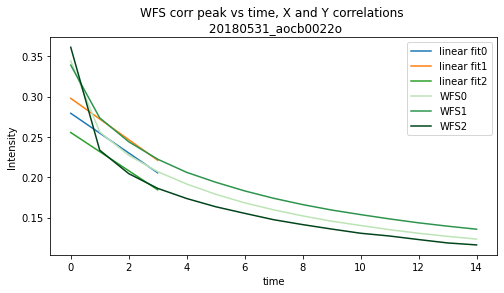

In [22]:
# for each file, linear fit back to 0 from 1-4 using average
p_file = "/home/emcewen/out/20180531/fits/20180531_aocb0022o_tmax1000_tts.fits"
pull_data = Cor.Correlator("", "", "", f_file = p_file)

tmax = 15 # dt considered for fits
mWFS = 3  # range of WFS used

# Pulling correlation information
t = np.arange(tmax)
avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
center_peak_avg = avg_acor[:3, 0:tmax, 7, 7]
    
# Fitting
c_min = 1 # begining of fit
c_max = 4 # end of fit

# fit for all wfs
center_avg = np.average(center_peak_avg, axis=0)
f1, f2 = tc.Linear_fit(t[c_min:c_max], center_avg[c_min:c_max])
lin_fit = tc.Linear_est(t[0:c_max], f1[0], f1[1])

# Begin plotting
g_cmap = cm.get_cmap('Greens', 8)
plt.figure(figsize=(8,4))

# fit for each wfs individually 
for wfs in range(mWFS):
    w_center_peak_avg = center_peak_avg[wfs]
    f1_w, f2_w = tc.Linear_fit(t[c_min:c_max], w_center_peak_avg[c_min:c_max])
    lin_fit_w = tc.Linear_est(t[0:c_max], f1_w[0], f1_w[1])
    plt.plot(t[0:c_max], lin_fit_w, label = "linear fit" + str(wfs))

for i in range(3): 
    c_float = (i+1)/3
    #plt.plot(t, center_peak_x[i][t], label = "Sx WFS" + str(i), linestyle=':', color = p_cmap(c_float))
    #plt.plot(t, center_peak_y[i][t], label = "Sy WFS" + str(i), linestyle=':', color = o_cmap(c_float))
    plt.plot(t, center_peak_avg[i][t], label = "WFS" + str(i), color = g_cmap(c_float))

#plt.plot(t, center_avg, label = "average")
#plt.plot(t[0:c_max], lin_fit, label = "linear fit avg")
    
plt.title(f'WFS corr peak vs time, X and Y correlations \n {pull_data.name}')
plt.ylabel('Intensity')
plt.xlabel('time')
#plt.yscale('log')
plt.legend(loc = 'upper right')

### Fit for all files

In [23]:
# Running WFS diff for all used files
diff_lst = []
# collecting noise values:
for file in fts_f:
    try:
        wfs_diff = tc.WFS_noise_linear(file)
        diff_lst.append(wfs_diff)
    except:
        print('error with file: ', file)

(0.0, 0.5)

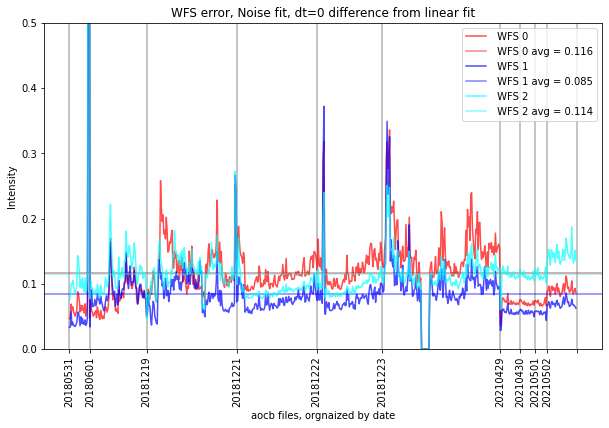

In [24]:
# plotting all noise 

wfs_err = np.array(diff_lst).T

color_list = ["r", "b", "cyan"]

plt.figure(figsize=(10,6))
plt.title("WFS error, Noise fit, dt=0 difference from linear fit")

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)

for wfs in range(mWFS):
    plt.plot(wfs_err[wfs], alpha = 0.7, c = color_list[wfs], label = f" WFS {wfs}")
    plt.axhline(np.mean(wfs_err[wfs]), c = color_list[wfs], alpha = 0.5, label = f" WFS {wfs} avg = {np.round(np.mean(wfs_err[wfs]),3)}")
    
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Intensity')
plt.xlabel('aocb files, orgnaized by date')
plt.legend(loc = 'upper right')
plt.ylim(0, 0.5)

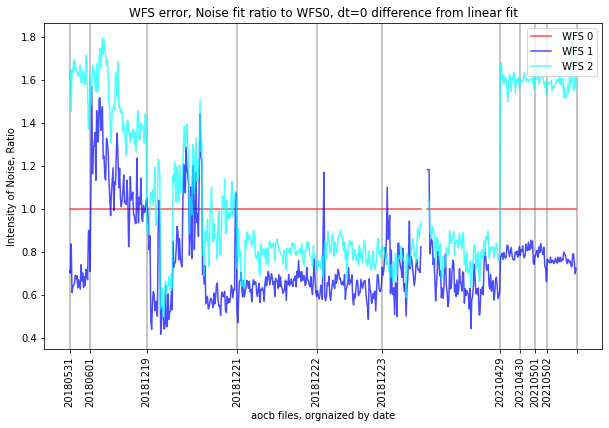

In [29]:
# Plotting noise ratios:
color_list = ["r", "b", "cyan"]

plt.figure(figsize=(10,6))
plt.title("WFS error, Noise fit ratio to WFS0, dt=0 difference from linear fit")

for c in count_lst:
    plt.axvline(c, c="black", alpha = 0.3)

for wfs in range(mWFS):
    plt.plot(wfs_err[wfs]/wfs_err[0], alpha = 0.7, c = color_list[wfs], label = f" WFS {wfs}")
    
plt.xticks(count_lst, dates, rotation ='vertical') 
plt.ylabel('Intensity of Noise, Ratio')
plt.xlabel('aocb files, orgnaized by date')
plt.legend(loc = 'upper right')
#plt.ylim(0, 0.5)
plt.show()

# Pulling MASS

In [5]:
import pandas as pd

mass_file = "/data/mkam/eden/eden.mass.dat.txt"

In [6]:
m_df = pd.read_csv(mass_file, delimiter=' * ')

In [7]:
m_df.keys()

Index(['#filename:', 'A', 'UT', 'fSee', 'e_fSee', 'See', 'e_See', 'fM0',
       'e_fM0', 'M0', 'e_M0', 'fHeff', 'e_fHeff', 'Heff', 'e_Heff', 'Isopl',
       'e_Isopl', 'M2', 'e_M2', 'Tau', 'e_Tau'],
      dtype='object')

In [8]:
m_df["date"] = m_df["UT"]+ " " + m_df["A"]

m_df["date"] = pd.to_datetime(m_df["date"])

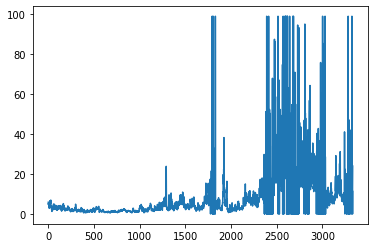

In [9]:
plt.plot(m_df["Tau"])

In [111]:
m_df["Tau"]

0        5.83
1        5.07
2        4.67
3        5.47
4        4.48
        ...  
3328    13.86
3329    12.81
3330    24.29
3331     0.00
3332    11.26
Name: Tau, Length: 3333, dtype: float64

(-0.05, 0.05)

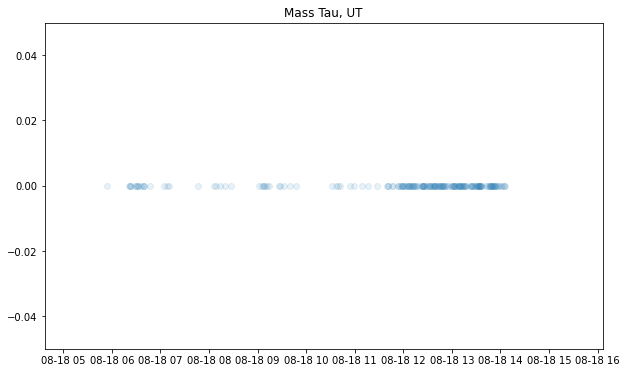

In [117]:
plt.figure(figsize=(10,6))
plt.title("Mass Tau, UT")

plt.scatter(m_df["UT"], m_df["Tau"], alpha = 0.1)
plt.ylim(0,0)